In [1]:
import cryptowatch as cw
import pandas as pd 
import matplotlib.pyplot as plt
print("All libraries imported successfully")

#set api key
cw.api_key = 'your api key here'


def get_price_action(exchange, market, period):
    candles=cw.markets.get("{}:{}".format(exchange, market)
                           , ohlc=True
                           , periods=["{}".format(period)])
    df = pd.DataFrame(getattr(candles, 'of_{}'.format(period)))
    df.columns=(["date","open", "high", "low", "close", "volume", "volume in {}".format(market[-3:])])
    df["date"] = pd.to_datetime(df["date"], unit='s')
    df.set_index("date", inplace=True)
    return df

print("Function defined sucessfully")

All libraries imported successfully
Function defined sucessfully


In [2]:
#pull weekly bitcoin price action and plot vs volume
df_btc_bithumb_1d = get_price_action(exchange="bithumb"
                                    ,market = "BTCKRW"
                                    ,period = '1d')

#pull weekly bitcoin price action and plot vs volume
df_btc_bithumb_1d

,open,high,low,close,volume,volume in KRW
date,,,,,,
2017-05-27,3150000.0,3450000.0,2900000.0,3222000.0,7810.099000,3.430000e+06
2017-05-28,3232000.0,3288000.0,2460000.0,3155000.0,30048.742000,3.280000e+06
2017-05-29,3155000.0,3400000.0,2850000.0,3149000.0,19275.816000,3.399000e+06
2017-05-30,3148000.0,3340000.0,2966000.0,3206000.0,17782.857000,3.334000e+06
2017-05-31,3206000.0,3300000.0,3100000.0,3144000.0,16320.267000,3.299000e+06
...,...,...,...,...,...,...
2020-07-12,11030000.0,11042000.0,10909000.0,10968000.0,1287.384203,1.412435e+10
2020-07-13,10968000.0,11054000.0,10903000.0,11023000.0,1737.364918,1.907103e+10
2020-07-14,11022000.0,11049000.0,10960000.0,11000000.0,2990.213625,3.292308e+10


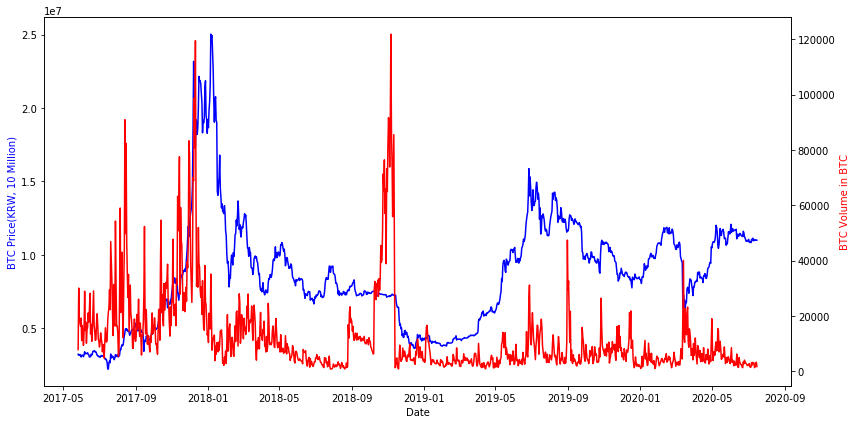

In [3]:
#pull weekly bitcoin price action and plot vs volume
df_btc_bithumb_1d = get_price_action(exchange="bithumb"
                                    ,market = "BTCKRW"
                                    ,period = '1d')
#set BTC price/time axis
fig, ax1 = plt.subplots(figsize = (12,6))
color = 'tab:blue'
ax1.set_ylabel('BTC Price(KRW, 10 Million)', color='blue')
ax1.set_xlabel('Date')
ax1.plot(df_btc_bithumb_1d.index
        ,df_btc_bithumb_1d["close"]
        ,color = 'blue')

#add second axis for volume
ax2 = ax1.twinx()

ax2.set_ylabel('BTC Volume in BTC', color='red')
ax2.plot(df_btc_bithumb_1d.index
         ,df_btc_bithumb_1d["volume"]
         ,color= 'red')
fig.tight_layout()

plt.show()